## Statistical Inference

**Sylvie Fortier**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as stats
from math import sqrt
from scipy.stats import chisquare

plt.figure(figsize=(6,5))

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

# Part 1a)

## (i) Calculate the $Z_{score}$ when X = 0%

To calculate the probability, we first need the Z-score.

where $Z_{score}=(\frac{X - \mu}{\sigma})$

In [2]:
X = 0 # mean Ha
mu = 14.7 # mean H0
sigma = 33

zscore = (X - mu) / sigma
zscore

-0.44545454545454544

## (ii) Calculate the *p*-value from the $Z_{score}$

From the $Z_{score}$, we need to find the associated *p*-value using $stats.norm.cdf(z_{score})$ because we are looking for the area under the curve directly to the left of X = 0 on $H_0$

In [3]:
p_value = stats.norm.cdf(zscore)
print ('The p-value =', p_value)

The p-value = 0.3279956507031998


## (iii) Calculate the percentage of years that this portfolio loses money (X<0)

This *p*-value is the probability that X < 0, that is, the percentile of X.

In [4]:
print ('The percentage of years that this portfolio loses money is {:.1%}.'.format(p_value))
print ('In other words, in about {:.1%} of years, the portfolio has a negative return.'.format(p_value))

The percentage of years that this portfolio loses money is 32.8%.
In other words, in about 32.8% of years, the portfolio has a negative return.


# Part 1b)

## (i) Calculate the critical value X when $q = 1 - 0.15$ (where q = lower tail probability, area to the left)

In [5]:
crit_x = stats.norm.ppf(q=1-0.15, loc=mu, scale=sigma)
print(crit_x)

48.90230185329506


In [6]:
print ('The cutoff for the highest 15% of annual returns with this portfolio is a return of {:.3}%.'.format(crit_x))
print ('In other words, it means that the probality to gain more than an annual return of {:.3}%, is 15%.'.format(crit_x))

The cutoff for the highest 15% of annual returns with this portfolio is a return of 48.9%.
In other words, it means that the probality to gain more than an annual return of 48.9%, is 15%.


# Part 2a)

In [7]:
n = 20 # sample size
sigma = 6 # population standard deviation
CI = 0.90
mu = 20 # mean_H0
mean_Ha = 14 # sample mean

## (i) Let's plot the $H_0$ curve

where $SE=(\frac{\sigma}{\sqrt{n}})$

#### Note: since the sample size is small (n<30), we cannot apply the normal distribution for this question and therefore will use the **Student's t-distribution** with df = n-1.

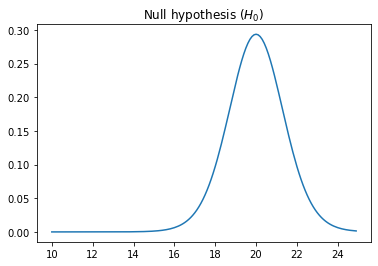

In [8]:
SE = sigma/sqrt(n)

x0=np.arange(10,25,0.1)
y0= stats.t.pdf(x=x0, loc=mu, scale=SE, df=n-1) # using loc=mean_H0 (equal to 20) and SE for the width of the curve

plt.plot(x0,y0)
plt.title("Null hypothesis ($H_0$)")
plt.show()

Here, the $H_0$ is that the number of hours did not change. The $H_a$ is that number of hours have been reduced. Thus, this is a **one-tail test**, and for $\alpha = (1 - CI)$ the $H_0$ is rejected if the **sample mean hours are in the lower α = 10% tail**.

Following the standard protocol, we shall first calculate the p-value for the observed sample mean.

## (ii) Calculate the p-value on the $H_0$ curve with the observed sample mean of 14h

- To find the *p*-value with Student's t-distribution, we are using $stats.t.cdf$(x = mean_Ha, df=n-1).
- Because we are looking for the area under the curve on the $H_0$ directly to the left of mean_Ha (one-tail test) we can compare the p-value to $\alpha$, not $\alpha$/2.

In [9]:
p_value = stats.t.cdf(x=mean_Ha, loc=mu, scale=SE, df=n-1) # mean_Ha=14h the sample mean that we compare with the mean_H0 of 20h
print(p_value)

print('The p-value or probability to observe the sample mean of {} or less is {:.3f}.'.format(mean_Ha, p_value))

0.0001305966891701308
The p-value or probability to observe the sample mean of 14 or less is 0.000.


## (iii) Calculate the critical value X on the $H_0$ curve when $q = 1 - CI$ (where q = lower tail probability, area to the left)

In [10]:
crit_x = stats.t.ppf(q=1-CI, loc=mu, scale=SE, df=n-1)
crit_x.round(2)

18.22

## (iv) Highlight the Type I error ($\alpha=1-CI$) on the $H_0$ graph created earlier

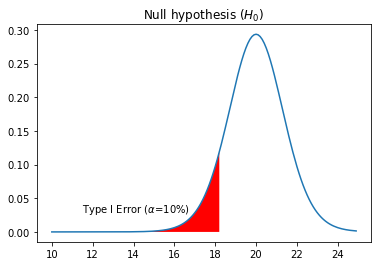

In [11]:
# Re-plot the null hypothesis curve
plt.plot(x0,y0)

# Highlight in red the alpha=10% using crit_x 
plt.fill_between(x=np.arange(10, crit_x, 0.1), y1=stats.t.pdf(x=np.arange(10, crit_x, 0.1), loc=mu, scale=SE, df=n-1), facecolor='red')

plt.title('Null hypothesis ($H_0$)')
plt.text(x=11.5, y=0.03, s= 'Type I Error ' r'($\alpha$=10%)')
plt.show()

In [12]:
print ('For this sample we find a p-value = {} which is much smaller that significance level set at α = 0.10. \nThe red area marks the chosen significance level α = 0.10. \nThe null hypothesis is rejected because the sample mean is in the lower 10% tail and falls in the red area (sample mean=14h and the crit_x is at {}h).  \nOur conclusion is that the collected sample confirms the reduction of abstenteeism hours and the new rewards system was effective with 90% confidence.'.format(round(p_value, 3), round(crit_x, 1)))

For this sample we find a p-value = 0.0 which is much smaller that significance level set at α = 0.10. 
The red area marks the chosen significance level α = 0.10. 
The null hypothesis is rejected because the sample mean is in the lower 10% tail and falls in the red area (sample mean=14h and the crit_x is at 18.2h).  
Our conclusion is that the collected sample confirms the reduction of abstenteeism hours and the new rewards system was effective with 90% confidence.


# Part 2b)

## (i) Plot $H_0$ and $H_a$ on the same graph

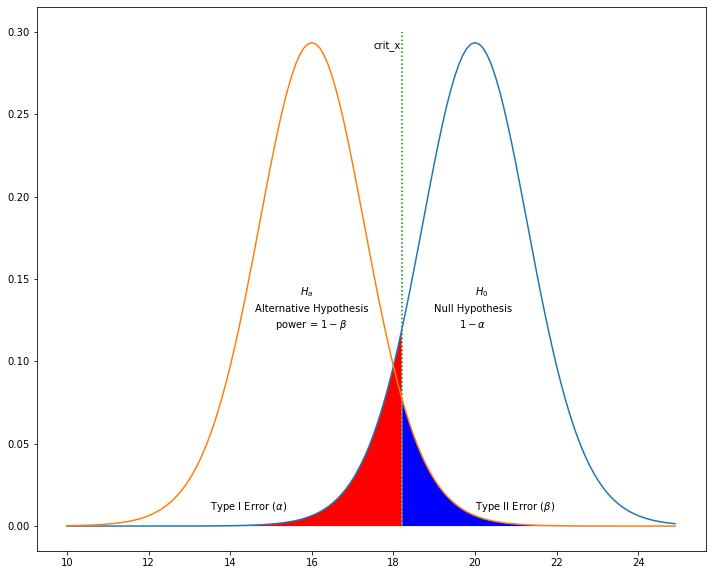

In [13]:
plt.figure(figsize=(12,10))

# Plot the null hypothesis in blue
plt.plot(x0,y0)

# Plot the alternative hypothesis in orange
xa=np.arange(10,25,0.1)
ya= stats.t.pdf(x=xa, loc=16, scale=SE, df=n-1) # where loc = new_mean_Ha = 16
plt.plot(xa,ya)

# Graph the critical x in green
plt.vlines(x=crit_x, ymin=0, ymax=0.3, colors='g', linestyles='dotted')

# Highlight in red Type I error
plt.fill_between(x=np.arange(10, crit_x, 0.1), y1=stats.t.pdf(x=np.arange(10, crit_x, 0.1), loc=mu, scale=SE, df=n-1), facecolor='red')

# Highlight in blue Type II error
plt.fill_between(x=np.arange(crit_x, 25, 0.1), y1=stats.t.pdf(x=np.arange(crit_x, 25, 0.1), loc=16, scale=SE, df=n-1), facecolor='blue') 

# Text on graph
plt.text(x=15.7, y=0.14, s= r'$H_a$')
plt.text(x=14.6, y=0.13, s= 'Alternative Hypothesis')
plt.text(x=20, y=0.14, s= r'$H_0$')
plt.text(x=19, y=0.13, s= 'Null Hypothesis')
plt.text(x=19.6, y=0.12, s= r'$1-\alpha$')
plt.text(x=15.1, y=0.12, s= r'power = $1-\beta$')
plt.text(x=13.5, y=0.01, s= 'Type I Error ' r'($\alpha$)')
plt.text(x=20, y=0.01, s= 'Type II Error ' r'($\beta$)')
plt.text(x=17.5, y=0.29, s= 'crit_x')
plt.show()

## (ii) Calculate the power of test on the $H_a$ curve 

- It means to calculate the area under the curve on $H_a$ to the left of the crit_x in green on the graph
- x = critical value on $H_0$ using the significance level $\alpha$ = 0.10 and the centre of $H_0$. It was previously calculated and is called **crit_x**.
- loc = new mean for the $H_a$ and is equals to 16h
- scale = same SE since we use the same sample size (𝑛 = 20) and the same population standard deviation ($\sigma$ = 6)

In [14]:
power_of_test = stats.t.cdf(x=crit_x, loc=16, scale=SE, df=n-1) 

print('The power of test when the reduction is 4 hours and sample size of 20 is: ', power_of_test)

The power of test when the reduction is 4 hours and sample size of 20 is:  0.9426916538739744


## (iii) Calculate $\beta$ (Type II error) from the power of test 

- It means to calculate the blue area on $H_a$ to the right of the crit_x in green on the graph
- $Power = 1 - \beta$:

In [15]:
beta = 1 - power_of_test

print('The probability that the new rewards system reduced absenteeism to 16 hours and you miss it is {:.2%}.'.format(beta))

The probability that the new rewards system reduced absenteeism to 16 hours and you miss it is 5.73%.


# Part 2c)

## (i) Calculate $Z_α$ for $\alpha$ = 10% (where $Z_α$ is the $Z_{score}$ which cuts 10% significance level on $H_0$)

In [16]:
Z_alpha = stats.t.ppf(q=0.10, df=n-1)
print('The Z-score for α = 10% on the null hypothesis curve is', Z_alpha)

The Z-score for α = 10% on the null hypothesis curve is -1.3277282090267981


Note that the $Z_α$ has a negative sign indicating that this is to the left of $H_0$ centre. We are interested in the distance calculation and therefore will use its absolute value |𝑍𝛼|.

## (ii) Calculate $Z_β$ for $\beta$ = 5% (where $Z_β$ is the $Z_{score}$ which leads to a power of 95% on $H_a$)

In [17]:
Z_beta = stats.t.ppf(q=1-0.05, df=n-1)
print('The Z-score for power = 95% on the alternative hypothesis curve is', Z_beta)

The Z-score for power = 95% on the alternative hypothesis curve is 1.729132811521367


## (iii) Calculate SE using $Z_{scores}$

where $SE = \frac{Centre_{H_0} - Centre_{H_a}}{|Z_{\alpha}| + |Z_{\beta}|}$

In [18]:
mean_H0 = 20
mean_Ha = 16

new_SE = (mean_H0 - mean_Ha) / (abs(Z_alpha) + abs(Z_beta))
new_SE

1.308531847902823

## (iv) Calculate sample size using new_SE

where $N_{samples}=(\frac{\sigma}{SE})^2$

In [19]:
N = (sigma/new_SE)**2
N.round(2)

21.02

#### If we want β to be 5% (and power to be 95%), we need to collect a random sample of 21 employees.

## (v) Check if the estimate of n=21 is good

In [20]:
# Calculate new SE with a sample size of 21

n_2 = 21

SE_2 = sigma/sqrt(n_2)
print('New SE with a sample size of 21 =', SE_2)

# Calculate new crit_x for 10% significance level (α=0.10) on null hypothesis (H0) using the new SE with a sample size of 21

crit_x_2 = stats.t.ppf(q=0.10, loc=mu, scale=SE_2, df=n_2-1)
print('New critical value X with a sample size of 21 =', crit_x_2.round(2))

# Calculate new power on alternative hypothesis (Ha) with a sample size of 21

power_of_test_2 = stats.t.cdf(x=crit_x_2, loc=16, scale=SE_2, df=n_2-1) 
print('New power of test with a sample size of 21 =', power_of_test_2)

# Calculate new beta on alternative hypothesis (Ha) with a sample size of 21
beta_2 = 1 - power_of_test_2
print('New beta with a sample size of 21 and significance level 10% is', beta_2.round(4))

print('Therefore, a sample size of 21 employees gives a β <= 5%')

New SE with a sample size of 21 = 1.3093073414159544
New critical value X with a sample size of 21 = 18.26
New power of test with a sample size of 21 = 0.9504567808734998
New beta with a sample size of 21 and significance level 10% is 0.0495
Therefore, a sample size of 21 employees gives a β <= 5%


# Part 3a)

## (i) Calculate the probability of waiting D days for each bin

This strategy identifies what proportion we would expect to be in each bin. The total sum must equal to 100%.

Where $P(D) = (1 - 0.532)^{D-1} * 0.532$

In [21]:
P1 = (1 - 0.532)**(1-1) * 0.532
print('Waiting for 1 day until observing an Up day [P(1)] occurs about {:.1%} of the time.' .format(P1))
P2 = (1 - 0.532)**(2-1) * 0.532
print('Waiting for 2 days until observing an Up day [P(2)] occurs about {:.1%} of the time.' .format(P2))
P3 = (1 - 0.532)**(3-1) * 0.532
print('Waiting for 3 days until observing an Up day [P(3)] occurs about {:.1%} of the time.' .format(P3))
P4 = (1 - 0.532)**(4-1) * 0.532
print('Waiting for 4 days until observing an Up day [P(4)] occurs about {:.1%} of the time.' .format(P4))
P5 = (1 - 0.532)**(5-1) * 0.532
print('Waiting for 5 days until observing an Up day [P(5)] occurs about {:.1%} of the time.' .format(P5))
P6 = (1 - 0.532)**(6-1) * 0.532
print('Waiting for 6 days until observing an Up day [P(6)] occurs about {:.1%} of the time.' .format(P6))
P7 = 1 - (P1 + P2 + P3 + P4 + P5 + P6) # Since the sum of all probabilities must equal 1
print('Waiting for 7+ days until observing an Up day [P(7+)] occurs about {:.1%} of the time.' .format(P7))

sum_prob = P1 + P2 + P3 + P4 + P5 + P6 + P7
print('The total sum of probabilities = {:.1%}' .format(sum_prob))

Waiting for 1 day until observing an Up day [P(1)] occurs about 53.2% of the time.
Waiting for 2 days until observing an Up day [P(2)] occurs about 24.9% of the time.
Waiting for 3 days until observing an Up day [P(3)] occurs about 11.7% of the time.
Waiting for 4 days until observing an Up day [P(4)] occurs about 5.5% of the time.
Waiting for 5 days until observing an Up day [P(5)] occurs about 2.6% of the time.
Waiting for 6 days until observing an Up day [P(6)] occurs about 1.2% of the time.
Waiting for 7+ days until observing an Up day [P(7+)] occurs about 1.1% of the time.
The total sum of probabilities = 100.0%


### An alternative way to calculate the geometric distribution is from using scipy.stats as follow:

In [22]:
P1 = stats.geom.pmf(1, 0.532)
print('Waiting for 1 day until observing an Up day [P(1)] occurs about {:.1%} of the time.' .format(P1))
P2 = stats.geom.pmf(2, 0.532)
print('Waiting for 2 days until observing an Up day [P(2)] occurs about {:.1%} of the time.' .format(P2))
P3 = stats.geom.pmf(3, 0.532)
print('Waiting for 3 days until observing an Up day [P(3)] occurs about {:.1%} of the time.' .format(P3))
P4 = stats.geom.pmf(4, 0.532)
print('Waiting for 4 days until observing an Up day [P(4)] occurs about {:.1%} of the time.' .format(P4))
P5 = stats.geom.pmf(5, 0.532)
print('Waiting for 5 days until observing an Up day [P(5)] occurs about {:.1%} of the time.' .format(P5))
P6 = stats.geom.pmf(6, 0.532)
print('Waiting for 6 days until observing an Up day [P(6)] occurs about {:.1%} of the time.' .format(P6))
P7 = 1 - (P1 + P2 + P3 + P4 + P5 + P6) # Since the sum of all probabilities must equal 1
print('Waiting for 7+ days until observing an Up day [P(7+)] occurs about {:.1%} of the time.' .format(P7))

sum_prob = P1 + P2 + P3 + P4 + P5 + P6 + P7
print('The total sum of probabilities = {:.1%}' .format(sum_prob))

Waiting for 1 day until observing an Up day [P(1)] occurs about 53.2% of the time.
Waiting for 2 days until observing an Up day [P(2)] occurs about 24.9% of the time.
Waiting for 3 days until observing an Up day [P(3)] occurs about 11.7% of the time.
Waiting for 4 days until observing an Up day [P(4)] occurs about 5.5% of the time.
Waiting for 5 days until observing an Up day [P(5)] occurs about 2.6% of the time.
Waiting for 6 days until observing an Up day [P(6)] occurs about 1.2% of the time.
Waiting for 7+ days until observing an Up day [P(7+)] occurs about 1.1% of the time.
The total sum of probabilities = 100.0%


### Calculate the geometric distribution using probability of 54.5%

In [23]:
P1b = stats.geom.pmf(1, 0.545)
print('Waiting for 1 day until observing an Up day [P(1)] occurs about {:.1%} of the time.' .format(P1b))
P2b = stats.geom.pmf(2, 0.545)
print('Waiting for 2 days until observing an Up day [P(2)] occurs about {:.1%} of the time.' .format(P2b))
P3b = stats.geom.pmf(3, 0.545)
print('Waiting for 3 days until observing an Up day [P(3)] occurs about {:.1%} of the time.' .format(P3b))
P4b = stats.geom.pmf(4, 0.545)
print('Waiting for 4 days until observing an Up day [P(4)] occurs about {:.1%} of the time.' .format(P4b))
P5b = stats.geom.pmf(5, 0.545)
print('Waiting for 5 days until observing an Up day [P(5)] occurs about {:.1%} of the time.' .format(P5b))
P6b = stats.geom.pmf(6, 0.545)
print('Waiting for 6 days until observing an Up day [P(6)] occurs about {:.1%} of the time.' .format(P6b))
P7b = 1 - (P1b + P2b + P3b + P4b + P5b + P6b) # Since the sum of all probabilities must equal 1
print('Waiting for 7+ days until observing an Up day [P(7+)] occurs about {:.1%} of the time.' .format(P7b))

sum_prob = P1b + P2b + P3b + P4b + P5b + P6b + P7b
print('The total sum of probabilities = {:.1%}' .format(sum_prob))

Waiting for 1 day until observing an Up day [P(1)] occurs about 54.5% of the time.
Waiting for 2 days until observing an Up day [P(2)] occurs about 24.8% of the time.
Waiting for 3 days until observing an Up day [P(3)] occurs about 11.3% of the time.
Waiting for 4 days until observing an Up day [P(4)] occurs about 5.1% of the time.
Waiting for 5 days until observing an Up day [P(5)] occurs about 2.3% of the time.
Waiting for 6 days until observing an Up day [P(6)] occurs about 1.1% of the time.
Waiting for 7+ days until observing an Up day [P(7+)] occurs about 0.9% of the time.
The total sum of probabilities = 100.0%


## (ii) Calculate the expected values for each bin where expected value = n*p 

- n = sum_observed (total number of days)
- p = P(D)

In [24]:
# Calculate the sum of the observed values (n)

observed = np.array([717, 369, 155, 69, 28, 14, 10])
sum_observed = sum(observed)

In [25]:
# Calculate the expected values = n*p

expected_value_P1 = sum_observed * P1 
print('The expected value for P(1) =', expected_value_P1)

expected_value_P2 = sum_observed * P2 
print('The expected value for P(2) =', expected_value_P2)

expected_value_P3 = sum_observed * P3
print('The expected value for P(3) =', expected_value_P3)

expected_value_P4 = sum_observed * P4
print('The expected value for P(4) =', expected_value_P4)

expected_value_P5 = sum_observed * P5
print('The expected value for P(5) =', expected_value_P5)

expected_value_P6 = sum_observed * P6
print('The expected value for P(6) =', expected_value_P6)

expected_value_P7 = sum_observed * P7
print('The expected value for P(7+) =', expected_value_P7)

sum_expected_values = expected_value_P1 + expected_value_P2 + expected_value_P3 + expected_value_P4 + expected_value_P5 + expected_value_P6 + expected_value_P7
print('The total sum of expected values with probability of 53.2%=', sum_expected_values)

The expected value for P(1) = 724.5840000000001
The expected value for P(2) = 339.105312
The expected value for P(3) = 158.70128601599998
The expected value for P(4) = 74.27220185548799
The expected value for P(5) = 34.75939046836838
The expected value for P(6) = 16.2673947391964
The expected value for P(7+) = 14.310414920947153
The total sum of expected values with probability of 53.2%= 1361.9999999999998


In [26]:
expected = np.array([expected_value_P1, expected_value_P2, expected_value_P3, expected_value_P4, expected_value_P5, expected_value_P6, expected_value_P7])
expected.round()

array([725., 339., 159.,  74.,  35.,  16.,  14.])

### Calculate the expected values for each bin with probability of 54.5%

In [27]:
# Calculate the expected values = n*p

expected_value_P1b = sum_observed * P1b 
print('The expected value for P(1) =', expected_value_P1b)

expected_value_P2b = sum_observed * P2b 
print('The expected value for P(2) =', expected_value_P2b)

expected_value_P3b = sum_observed * P3b
print('The expected value for P(3) =', expected_value_P3b)

expected_value_P4b = sum_observed * P4b
print('The expected value for P(4) =', expected_value_P4b)

expected_value_P5b = sum_observed * P5b
print('The expected value for P(5) =', expected_value_P5b)

expected_value_P6b = sum_observed * P6b
print('The expected value for P(6) =', expected_value_P6b)

expected_value_P7b = sum_observed * P7b
print('The expected value for P(7+) =', expected_value_P7b)

sum_expected_values_b = expected_value_P1b + expected_value_P2b + expected_value_P3b + expected_value_P4b + expected_value_P5b + expected_value_P6b + expected_value_P7b
print('The total sum of expected values with probability of 54.5%=', sum_expected_values_b)

The expected value for P(1) = 742.2900000000001
The expected value for P(2) = 337.74195
The expected value for P(3) = 153.67258725
The expected value for P(4) = 69.92102719874998
The expected value for P(5) = 31.814067375431243
The expected value for P(6) = 14.475400655821213
The expected value for P(7+) = 12.084967519997523
The total sum of expected values with probability of 54.5%= 1362.0


In [28]:
expected_b = np.array([expected_value_P1b, expected_value_P2b, expected_value_P3b, expected_value_P4b, expected_value_P5b, expected_value_P6b, expected_value_P7b])
expected_b.round()

array([742., 338., 154.,  70.,  32.,  14.,  12.])

# Part 3b)

In [29]:
chi_test = chisquare(f_obs=observed, f_exp=expected)

print('Chi-square Statistic with probability of 53.2% is', chi_test.statistic)
print('p-value = %.4f' %chi_test.pvalue)

Chi-square Statistic with probability of 53.2% is 6.104205360859158
p-value = 0.4116


In [30]:
chi_test_b = chisquare(f_obs=observed, f_exp=expected_b)

print('Chi-square Statistic with probability of 54.5% is', chi_test_b.statistic)
print('p-value = %.4f' %chi_test_b.pvalue)

Chi-square Statistic with probability of 54.5% is 4.610747780774837
p-value = 0.5946


The $H_0$ is that the stock market being up or down on a given day is independent from all other days. On the other hand, the $H_a$ is that the stock market being up or down on a given day is not independent from all other days. Since we know the number of days until an Up day would follow a geometric distribution under $H_0$, we look for deviations from the geometric distribution, which would support $H_a$.

Since p-value = 0.4116 (or 0.5946), we do not have sufficient evidence to reject $H_0$, that is to reject the notion that trading days are independent for the last 10 years of data for the S&P500 index. 

As a trader and owner of the S&P500 index, I have been hearing for years the notion that the market is *due* for an Up or Down swing if there have been several consecutive days where it has been Up or Down. However, the example above does not provide strong evidence for the $H_a$ which states that there is any such property where the market is *due* for a correction. At the very least, the analysis suggests any dependence between days is very weak and could happen simply by chance. 

If information from past trading days could be used to predict what will happen today or tomorrow, that information could provide an advantage over other traders. However, the analysis above suggests that we cannot predict Up days based on information from past trading days. Basically, trading decision to sell S&P500 index should not be based on trying to predict with accuracy the next Up day.